In [44]:
##################################
#     Sales Data Analysis        #
##################################


# Again, the dataset we're working on is from Kaggle:
# https://www.kaggle.com/subhendughosh/monthly-sales-data
# Hufi
# 19/10/2020

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import datetime as dt

In [10]:
# let's read our data and also prepare it for further usage:

In [11]:
path = Path('YOUR FILE PATH HERE')
files = [file for file in os.listdir(path)]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [12]:
all_data = pd.DataFrame()
for file in files:
    quick_df = pd.read_csv(path / file)
    all_data = pd.concat([all_data, quick_df])

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [14]:
all_data.dropna(inplace=True)
all_data.sample(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15583,293689,USB-C Charging Cable,1,11.95,11/17/19 20:11,"239 Chestnut St, New York City, NY 10001"
9517,171098,27in 4K Gaming Monitor,1,389.99,03/07/19 14:24,"983 Adams St, San Francisco, CA 94016"
10517,204078,Macbook Pro Laptop,1,1700,05/03/19 18:49,"415 2nd St, Dallas, TX 75001"
3923,154240,34in Ultrawide Monitor,1,379.99,02/13/19 09:02,"441 Hickory St, Los Angeles, CA 90001"
1780,261050,Wired Headphones,1,11.99,10/02/19 18:00,"533 Cedar St, Portland, OR 97035"
12472,205951,27in FHD Monitor,1,149.99,05/19/19 23:30,"199 North St, San Francisco, CA 94016"
2929,281606,Bose SoundSport Headphones,1,99.99,11/14/19 12:25,"120 North St, Los Angeles, CA 90001"
8197,256010,Bose SoundSport Headphones,1,99.99,09/26/19 16:34,"341 River St, Los Angeles, CA 90001"
9164,256945,Wired Headphones,2,11.99,09/18/19 20:38,"691 Dogwood St, Los Angeles, CA 90001"
2741,261969,Vareebadd Phone,1,400,10/21/19 12:48,"626 Elm St, Dallas, TX 75001"


In [15]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [16]:
all_data = all_data[all_data['Quantity Ordered']!='Quantity Ordered']

In [17]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Price Each']=all_data['Price Each'].astype(float)

In [18]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [19]:
all_data['month'] = all_data['Order Date'].dt.month

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [21]:
all_data['Sale value'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale value
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [23]:
monthly_data = all_data.groupby('month')['Sale value'].sum().reset_index()
monthly_data.head()

,month,Sale value
0,1,1.822257e+06
1,2,2.202022e+06
2,3,2.807100e+06
3,4,3.390670e+06
4,5,3.152607e+06


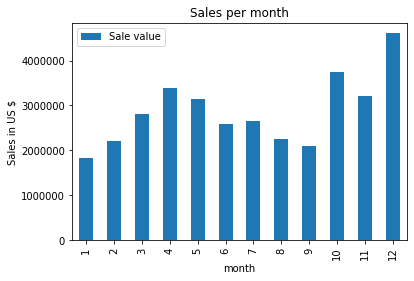

In [24]:
months= range(1, 13)
monthly_data.plot(x='month', y='Sale value', kind='bar')
plt.title('Sales per month')
plt.ylabel('Sales in US $')
plt.show()

In [25]:
# at which time of the day do we sell most?
all_data['hour'] = all_data['Order Date'].dt.hour

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale value,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [27]:
hour=[]
sales_amt=[]
for key, sales_per_hour_df in all_data.groupby('hour'):
    hour.append(key)  # die stunden des Tages
    sales_amt.append(len(sales_per_hour_df)) # die jeweiligen Sales 

Text(0.5, 1.0, 'when do we sell most?')

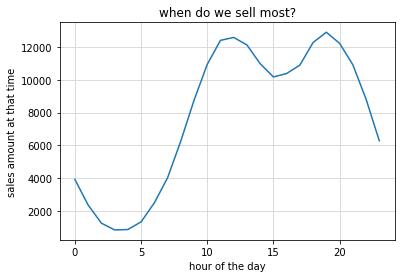

In [28]:
plt.grid(color='lightgrey')
plt.plot(hour, sales_amt)
plt.xlabel('hour of the day')
plt.ylabel('sales amount at that time')
plt.title('when do we sell most?')

In [29]:
def get_city(x):
    return(x.split(',')[1])

In [30]:
# which city is the one we send the most goods to?
all_data['city']=all_data['Purchase Address'].apply(get_city)

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale value,hour,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles


In [32]:
city_data = all_data.groupby('city')['Order ID'].count()
city_data.columns=['city', 'orders']
city_data

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: Order ID, dtype: int64

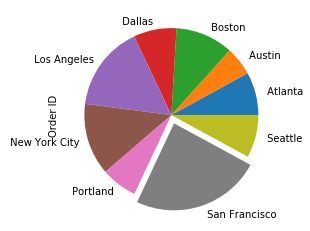

In [33]:
explode = (0, 0 , 0 , 0 , 0 , 0 , 0 , 0.1, 0)
city_data.plot(x='city', y='orders', kind='pie', explode=explode)

Text(0, 0.5, 'Items sold')

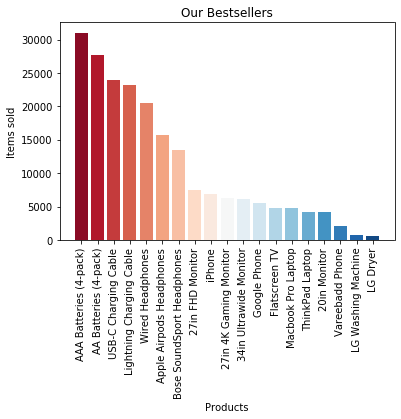

In [34]:
# which product is our best seller?
bestsellers = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered', ascending=False)
plt.bar(data=bestsellers, x='Product', height='Quantity Ordered', color=sns.color_palette('RdBu', len(bestsellers)))
plt.xticks(rotation=90)
plt.title('Our Bestsellers')
plt.xlabel('Products')
plt.ylabel('Items sold')

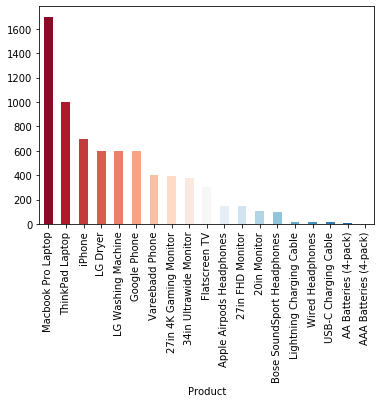

In [35]:
#what's our average price for each product?
avg_price = all_data.groupby('Product')['Price Each'].mean()
avg_price.sort_values(ascending=False).plot.bar(color=sns.color_palette('RdBu', len(avg_price)))

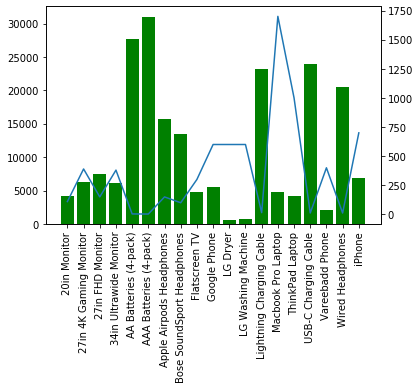

In [36]:
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
products = quantity.index
prices=all_data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots()
ax1.bar(products, quantity, color='g')
ax2=ax1.twinx()
ax1.set_xticklabels(products, rotation=90)
ax2.plot(products, prices)

In [37]:
# is there any products that are often sold together (e.g. some cables with monitors)?
relationsdf = all_data[all_data['Order ID'].duplicated(keep=False)]
relationsdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale value,hour,city
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,19,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,19,Los Angeles
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,11,Boston


In [38]:
relationsdf['Grouped'] = relationsdf.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\Sabrina\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
relationsdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale value,hour,city,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,19,Los Angeles,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,19,Los Angeles,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,11,Boston,"Bose SoundSport Headphones, Bose SoundSport He..."


In [40]:
relationsdf.drop_duplicates(subset='Order ID') # get rid of duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale value,hour,city,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,19,Los Angeles,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,11,Boston,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,17,San Francisco,"AAA Batteries (4-pack), Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,11,New York City,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
11617,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001",9,150.00,16,Dallas,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,700.00,18,Boston,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,34in Ultrawide Monitor,1,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,379.99,20,Atlanta,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,0,Atlanta,"Wired Headphones, AAA Batteries (4-pack)"


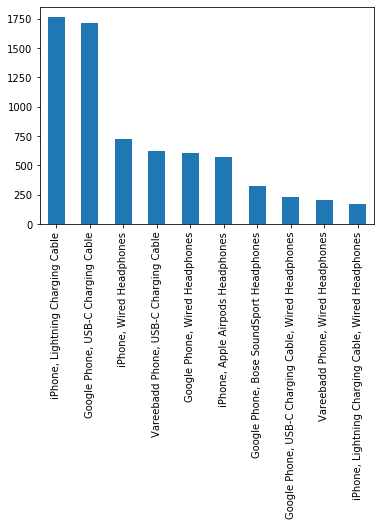

In [41]:
relationsdf['Grouped'].value_counts()[0:10].plot.bar()

In [42]:
# understandable - phones & cables are very often sold together, pones and Headphones are also quite a popular combo.

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale value,hour,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles


In [45]:
################################################################################################################################